LightGBM with scikit Learn

In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, matthews_corrcoef
import time


Without Features selection 

In [2]:
file_path = "../../../data/processed/train_data.csv"
df = pd.read_csv(file_path)
file_path2= "../../../data/processed/test_data.csv"
df2 = pd.read_csv(file_path2)

In [3]:

X_train = df.drop(columns=['target'])
y_train = df['target']
X_test = df2.drop(columns=['target'])
y_test = df2['target']

# Model
model = lgb.LGBMClassifier(
    learning_rate=0.1,   
    n_estimators=300,   
    max_bin=70,         
    random_state=42
)

# Measure training time
start_train_without_fs = time.time()

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss',
)

end_train = time.time()
training_time_without_fs= end_train - start_train_without_fs

# Predictions
start_test_without_fs = time.time()

y_pred_prob_without_fs = model.predict_proba(X_test)[:, 1]  
y_pred_without_fs = (y_pred_prob_without_fs > 0.5).astype(int)

end_test = time.time()
testing_time_without_fs = end_test - start_test_without_fs


# Feature importances
feature_importances = model.feature_importances_

# Output results
print(f"\nTraining Time: {training_time_without_fs:.4f} seconds")
print(f"Testing Time: {testing_time_without_fs:.4f} seconds")

print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


[LightGBM] [Info] Number of positive: 416, number of negative: 430
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52656
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 753
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491726 -> initscore=-0.033100
[LightGBM] [Info] Start training from score -0.033100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [4]:
#evaluation 
accuracy = accuracy_score(y_test, y_pred_without_fs)
mse = mean_squared_error(y_test, y_pred_without_fs)
print(f"Erreur Quadratique Moyenne (MSE) : {mse:.4f}")
accuracy_without_fs = accuracy_score(y_test, y_pred_without_fs)
class_report_without_fs = classification_report(y_test, y_pred_without_fs, output_dict=True)
mcc_without_fs = matthews_corrcoef(y_test, y_pred_without_fs)

Erreur Quadratique Moyenne (MSE) : 0.0355


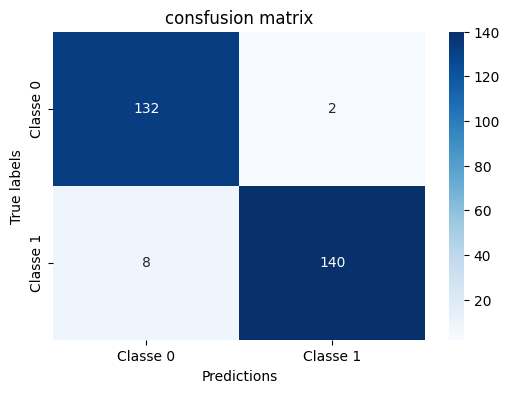

In [5]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, (y_pred_without_fs >= 0.5).astype(int))
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("consfusion matrix")
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.show()


AUC : 99.70%


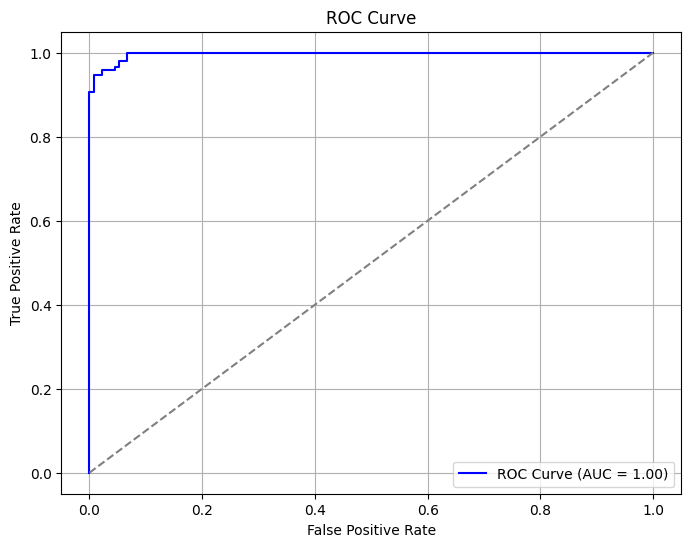

In [6]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_without_fs)  # ROC
roc_auc = auc(fpr, tpr)                           # AUC

# ROC
print(f"AUC : {roc_auc:.2%}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


With features Selection

In [7]:
df1= pd.read_csv("../../../data/processed/train_filtered.csv")
df_test=pd.read_csv("../../../data/processed/test_filtered.csv")
X_train1 = df1.drop(columns=['target'])
y_train1 = df1['target']
X_test1 = df_test.drop(columns=['target'])
y_test1 = df_test['target']

In [8]:


# Model
model = lgb.LGBMClassifier(
    objective='binary',  
    learning_rate=0.1,
    n_estimators=300,
    random_state=42,
    max_bin=70,  
)

# Measure training time
start_train_with_fs = time.time()

model.fit(
    X_train1, y_train1,
    eval_set=[(X_test1, y_test1)],
    eval_metric='logloss',
)

end_train = time.time()
training_time_with_fs = end_train - start_train_with_fs

# Predictions
start_test_with_fs = time.time()

y_pred_prob_with_fs  = model.predict_proba(X_test1)[:, 1]  
y_pred_with_fs = (y_pred_prob_with_fs  > 0.5).astype(int)  

end_test = time.time()
testing_time_with_fs = end_test - start_test_with_fs


# Feature importances
feature_importances = model.feature_importances_

# Output results
print(f"\nTraining Time: {training_time_with_fs:.4f} seconds")
print(f"Testing Time: {testing_time_with_fs:.4f} seconds")

print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


[LightGBM] [Info] Number of positive: 416, number of negative: 430
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491726 -> initscore=-0.033100
[LightGBM] [Info] Start training from score -0.033100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [9]:
# Evaluation
mse = mean_squared_error(y_test1, y_pred_with_fs)
print(f"Erreur Quadratique Moyenne (MSE) : {mse:.4f}")
accuracy_with_fs = accuracy_score(y_test, y_pred_with_fs)
class_report_with_fs = classification_report(y_test, y_pred_with_fs, output_dict=True)
mcc_with_fs = matthews_corrcoef(y_test, y_pred_with_fs)


Erreur Quadratique Moyenne (MSE) : 0.0426


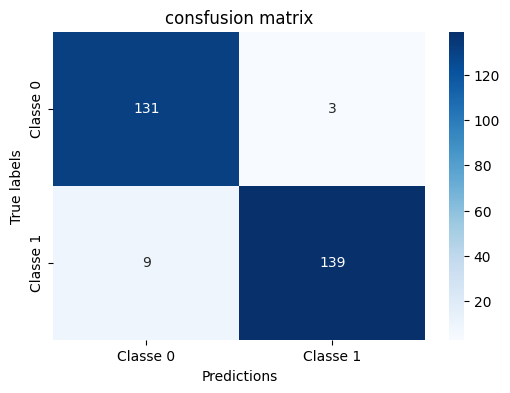

In [10]:
#confusion matrix
conf_matrix = confusion_matrix(y_test1, (y_pred_with_fs >= 0.5).astype(int))

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.title("consfusion matrix")
plt.xlabel("Predictions")
plt.ylabel("True labels")
plt.show()


AUC : 95.84%


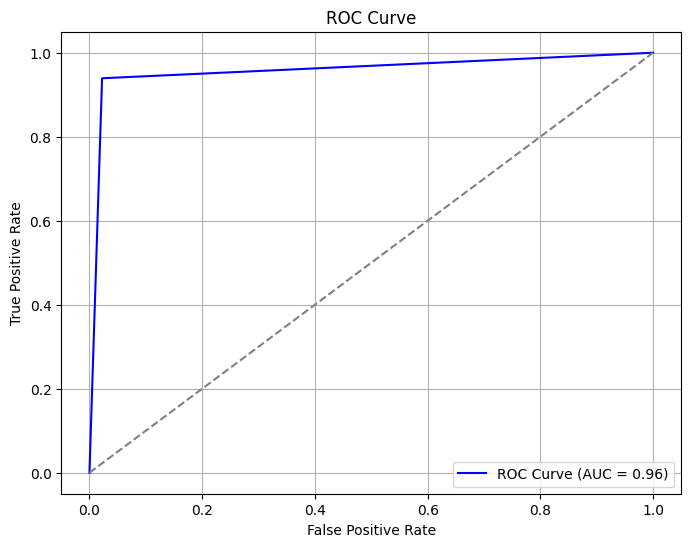

In [11]:


fpr, tpr, thresholds = roc_curve(y_test1, y_pred_with_fs)  # ROC
roc_auc = auc(fpr, tpr)                           # AUC

# ROC
print(f"AUC : {roc_auc:.2%}")



plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


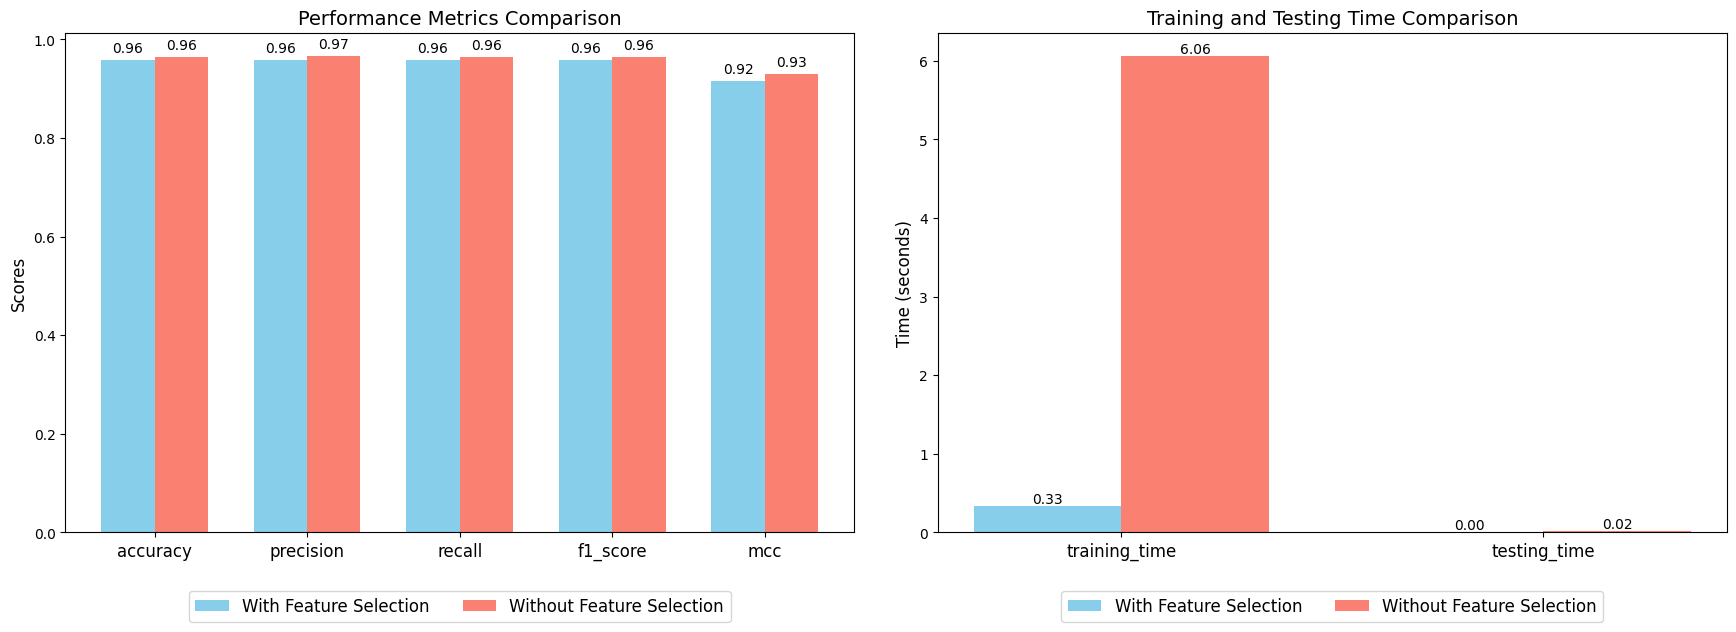

In [12]:
performance_metrics = ["accuracy", "precision", "recall", "f1_score", "mcc"]
time_metrics = ["training_time", "testing_time"]

metrics_with_fs = {
    "accuracy": accuracy_with_fs,
    "precision": class_report_with_fs["weighted avg"]["precision"],
    "recall": class_report_with_fs["weighted avg"]["recall"],
    "f1_score": class_report_with_fs["weighted avg"]["f1-score"],
    "mcc": mcc_with_fs,
    "training_time": training_time_with_fs,
    "testing_time": testing_time_with_fs,
}

metrics_without_fs = {
    "accuracy": accuracy_without_fs,
    "precision": class_report_without_fs["weighted avg"]["precision"],
    "recall": class_report_without_fs["weighted avg"]["recall"],
    "f1_score": class_report_without_fs["weighted avg"]["f1-score"],
    "mcc": mcc_without_fs,
    "training_time": training_time_without_fs,
    "testing_time": testing_time_without_fs,
}

# Set up the bar chart parameters
x_perf = np.arange(len(performance_metrics))
x_time = np.arange(len(time_metrics))
width = 0.35

# Plotting the performance metrics comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Performance Metrics Plot
with_fs_performance = [metrics_with_fs[m] for m in performance_metrics]
without_fs_performance = [metrics_without_fs[m] for m in performance_metrics]

rects1 = ax1.bar(x_perf - width / 2, with_fs_performance, width, label="With Feature Selection", color="skyblue")
rects2 = ax1.bar(x_perf + width / 2, without_fs_performance, width, label="Without Feature Selection", color="salmon")

ax1.set_ylabel("Scores", fontsize=12)
ax1.set_title("Performance Metrics Comparison", fontsize=14)
ax1.set_xticks(x_perf)
ax1.set_xticklabels(performance_metrics, fontsize=12)
ax1.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12)

# Add values to bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2.0,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

# Time Metrics Plot
with_fs_time = [metrics_with_fs[m] for m in time_metrics]
without_fs_time = [metrics_without_fs[m] for m in time_metrics]

rects3 = ax2.bar(x_time - width / 2, with_fs_time, width, label="With Feature Selection", color="skyblue")
rects4 = ax2.bar(x_time + width / 2, without_fs_time, width, label="Without Feature Selection", color="salmon")

ax2.set_ylabel("Time (seconds)", fontsize=12)
ax2.set_title("Training and Testing Time Comparison", fontsize=14)
ax2.set_xticks(x_time)
ax2.set_xticklabels(time_metrics, fontsize=12)
ax2.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12)

# Add values to bars
for rect in rects3 + rects4:
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

fig.tight_layout(pad=3)
plt.show()